In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import chi2_contingency
import statsmodels.api


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree   
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
import warnings 
warnings.filterwarnings("ignore")

In [132]:
dt_prin = pd.read_csv("./Projet_Finale/data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
dt_prin

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [133]:
dt= dt_prin.copy()
dt.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [134]:
dt.drop(['Over18','EmployeeNumber','StandardHours','EmployeeCount'],axis=1,inplace=True)
dt.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [135]:
label_encoder = preprocessing.LabelEncoder()

In [136]:
dt.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [137]:
dt.shape

(1470, 31)

In [138]:
groups=dt.groupby(dt.Attrition)

In [139]:
dt_attri = groups.get_group('Yes')

In [140]:
dt_attri.shape

(237, 31)

In [141]:
dt_nonAttri = groups.get_group('No')


In [142]:
dt_nonAttri.shape

(1233, 31)

In [143]:
dt_nonAttrit = dt.iloc[:237,:]

In [144]:
dt_nonAttrit.shape

(237, 31)

In [145]:
dt_divi = pd.concat([dt_attri,dt_nonAttrit],axis=0)

In [146]:
dt_divi.shape

(474, 31)

In [147]:
features_to_encode = ['Attrition','BusinessTravel', 'Department', 'EducationField', 
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [148]:
for i in features_to_encode:
    dt_divi[i] = label_encoder.fit_transform(dt_divi[i])

In [149]:
dt_divi

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
14,28,1,2,103,1,24,3,1,3,1,...,3,2,0,6,4,3,4,2,0,3
21,36,1,2,1218,2,9,4,1,3,1,...,4,2,0,10,4,3,5,3,0,3
24,34,1,2,699,1,6,1,3,2,1,...,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,59,0,2,818,0,6,2,3,2,1,...,3,4,0,7,2,2,2,2,2,2
233,50,0,2,854,2,1,4,3,4,0,...,3,3,1,32,3,2,7,0,0,6
234,33,1,2,813,1,14,3,3,3,1,...,3,3,1,8,2,1,5,4,0,4
235,43,0,2,1034,2,16,3,2,4,0,...,4,3,1,22,3,3,17,13,1,9


<h1>APPLIQUONS LES DIFFERENTS MODEL DE ML</h1>

<h3>1-MODEL DE REGRESSION LOGISTIQUE</h3>

In [151]:
dt_targ=dt_divi['Attrition']
dt_targ.head()

0     1
2     1
14    1
21    1
24    1
Name: Attrition, dtype: int32

In [152]:
dt_feat= dt_divi[['Age','DailyRate','DistanceFromHome','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','MonthlyIncome','StockOptionLevel','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager','WorkLifeBalance','TrainingTimesLastYear','BusinessTravel','Department','EducationField','JobRole','MaritalStatus','OverTime']]

In [153]:
dt_feat.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,WorkLifeBalance,TrainingTimesLastYear,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,OverTime
0,41,1102,1,2,3,4,5993,0,8,6,4,5,1,0,2,2,1,7,2,1
2,37,1373,2,4,2,3,2090,0,7,0,0,0,3,3,2,1,4,2,2,1
14,28,103,24,3,2,3,2028,0,6,4,2,3,3,4,2,1,1,2,2,1
21,36,1218,9,3,2,1,3407,0,10,5,3,3,3,4,2,2,1,8,2,0
24,34,699,6,2,3,1,2960,0,8,4,2,3,3,2,2,1,3,6,2,0


In [160]:
x = dt_feat
y= dt_targ

In [161]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) 

In [162]:
logreg = LogisticRegression() 
logreg = logreg.fit(x_train, y_train) 

In [163]:
y_pred  = logreg.predict(x_test) 

In [164]:
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.64


<p>On constate le model de regression logistique a un taux d'exactitude de 64%</p>

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

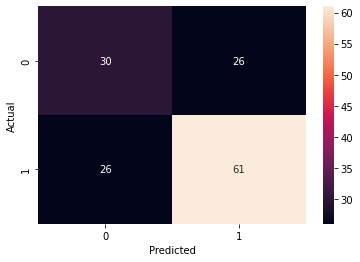

In [165]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

<p>
<ul>
<li><strong>TP:</strong>30,donc l'ordinateur a predit que 30 employé n'avais pas demissionné et effectivement il avait pas demissionné</li>
<li><strong>TN:</strong>61,donc l'ordinateur a predit que 61 employé avais demissionné et effectivement il avait 61 demissionné</li>
<li><strong>FP:</strong>26,donc l'ordinateur a predit que 26 employé avais demissionné mais il avait pas demissionné</li>
<li><strong>FN:</strong>26,donc l'ordinateur a predit que 70 n'avais pas demissionné mais il avait 26 qui avait demissionné</li>
</ul>
</p>

<h3>2-MODEL K-NEAREST-NEIGHBOR(KNN)</h3>

In [166]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.58
Accuracy for k= 2 is: 0.48
Accuracy for k= 3 is: 0.57
Accuracy for k= 4 is: 0.57
Accuracy for k= 5 is: 0.6
Accuracy for k= 6 is: 0.62
Accuracy for k= 7 is: 0.6
Accuracy for k= 8 is: 0.6
Accuracy for k= 9 is: 0.59
Accuracy for k= 10 is: 0.6
Accuracy for k= 11 is: 0.58
Accuracy for k= 12 is: 0.57
Accuracy for k= 13 is: 0.57
Accuracy for k= 14 is: 0.57
Accuracy for k= 15 is: 0.6
Accuracy for k= 16 is: 0.58
Accuracy for k= 17 is: 0.59
Accuracy for k= 18 is: 0.59
Accuracy for k= 19 is: 0.59
Accuracy for k= 20 is: 0.61
Accuracy for k= 21 is: 0.62
Accuracy for k= 22 is: 0.61
Accuracy for k= 23 is: 0.62
Accuracy for k= 24 is: 0.6
Accuracy for k= 25 is: 0.62
Accuracy for k= 26 is: 0.61
Accuracy for k= 27 is: 0.59
Accuracy for k= 28 is: 0.59
Accuracy for k= 29 is: 0.61


Text(0, 0.5, 'Testing Accuracy')

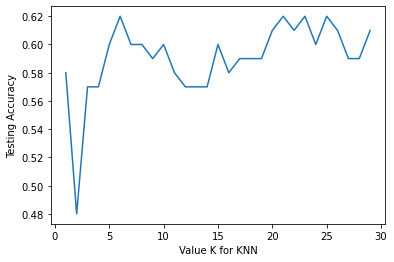

In [167]:
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

<p>On constate que le meilleur K a prend est 6</p>

In [168]:
knn=KNeighborsClassifier(n_neighbors=6) 
knn.fit(x_train,y_train) 

KNeighborsClassifier(n_neighbors=6)

In [173]:
y_pred=knn.predict(x_test) 

In [174]:
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.6153846153846154


<p>On constate le model KNN a un taux d'exactitude de 61%</p>

<h3>3-MODEL Tree Prediction</h3>

<h3>Tree Pruning Code</h3>

In [176]:
dtree= tree.DecisionTreeClassifier(criterion="gini",splitter='random',max_leaf_nodes=10,min_samples_leaf=5,max_depth=5)

In [177]:
dtree.fit(x_train, y_train)   


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=5,
                       splitter='random')

In [178]:
y_pred=dtree.predict(x_test)  

In [179]:
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.6573426573426573


<p>On constate le model Tree pruning a un taux d'exactitude de 65%</p>

<h3>RANDOM FOREST</h3>

In [296]:
n_estima=30
scoress=[]
for k in range(1,30):
    clf=RandomForestClassifier(n_estima) 
    clf.fit(x_train, y_train) 
    y_pred=clf.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scoress.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.71
Accuracy for k= 2 is: 0.75
Accuracy for k= 3 is: 0.75
Accuracy for k= 4 is: 0.74
Accuracy for k= 5 is: 0.73
Accuracy for k= 6 is: 0.76
Accuracy for k= 7 is: 0.71
Accuracy for k= 8 is: 0.74
Accuracy for k= 9 is: 0.66
Accuracy for k= 10 is: 0.71
Accuracy for k= 11 is: 0.69
Accuracy for k= 12 is: 0.73
Accuracy for k= 13 is: 0.69
Accuracy for k= 14 is: 0.76
Accuracy for k= 15 is: 0.71
Accuracy for k= 16 is: 0.74
Accuracy for k= 17 is: 0.77
Accuracy for k= 18 is: 0.71
Accuracy for k= 19 is: 0.73
Accuracy for k= 20 is: 0.73
Accuracy for k= 21 is: 0.75
Accuracy for k= 22 is: 0.71
Accuracy for k= 23 is: 0.76
Accuracy for k= 24 is: 0.69
Accuracy for k= 25 is: 0.73
Accuracy for k= 26 is: 0.69
Accuracy for k= 27 is: 0.7
Accuracy for k= 28 is: 0.73
Accuracy for k= 29 is: 0.73


Text(0, 0.5, 'Testing Accuracy')

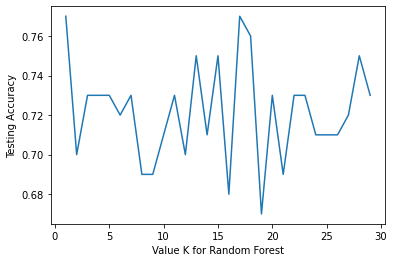

In [269]:
plt.plot(range(1,30),scoress)
plt.xlabel('Value K for Random Forest')
plt.ylabel('Testing Accuracy')

<p>On constate que le meilleur K est 15</p>

In [293]:
clf=RandomForestClassifier(n_estimators=16) 
clf.fit(x_train, y_train)  

RandomForestClassifier(n_estimators=16)

In [294]:
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.7552447552447552


<p>On constate le model random forest a un taux d'exactitude de 75%</p>

<h1>CONFIRMATION AVEC LE MODEL K-FOLD</h1>

In [297]:
from sklearn.model_selection import cross_val_score

In [298]:
score=cross_val_score(clf,dt_feat,dt_targ,cv=5)

In [299]:
print(scores)
print(sum(score)/5)

[0.75, 0.78, 0.7, 0.73, 0.72, 0.66, 0.69, 0.73, 0.71, 0.73, 0.72, 0.76, 0.76, 0.71, 0.72, 0.73, 0.7, 0.76, 0.74, 0.71, 0.76, 0.73, 0.71, 0.71, 0.71, 0.72, 0.71, 0.75, 0.71]
0.7597760358342664


<p>On constate que avec le model ramdom forest la meilleur performance est 0.78</p>

In [300]:
score=cross_val_score(dtree,dt_feat,dt_targ,cv=5)

In [301]:
print(scores)
print(sum(score)/5)

[0.75, 0.78, 0.7, 0.73, 0.72, 0.66, 0.69, 0.73, 0.71, 0.73, 0.72, 0.76, 0.76, 0.71, 0.72, 0.73, 0.7, 0.76, 0.74, 0.71, 0.76, 0.73, 0.71, 0.71, 0.71, 0.72, 0.71, 0.75, 0.71]
0.6626203807390818


<p>On constate que avec le model tree pruning la meilleur performance est 0.76</p>

In [302]:
score=cross_val_score(knn,dt_feat,dt_targ,cv=5)

In [303]:
print(scores)
print(sum(score)/5)

[0.75, 0.78, 0.7, 0.73, 0.72, 0.66, 0.69, 0.73, 0.71, 0.73, 0.72, 0.76, 0.76, 0.71, 0.72, 0.73, 0.7, 0.76, 0.74, 0.71, 0.76, 0.73, 0.71, 0.71, 0.71, 0.72, 0.71, 0.75, 0.71]
0.6098320268757


<p>On constate que avec le model knn la meilleur performance est 76%</p>

In [304]:
score=cross_val_score(logreg,dt_feat,dt_targ,cv=5)

In [305]:
print(scores)
print(sum(score)/5)

[0.75, 0.78, 0.7, 0.73, 0.72, 0.66, 0.69, 0.73, 0.71, 0.73, 0.72, 0.76, 0.76, 0.71, 0.72, 0.73, 0.7, 0.76, 0.74, 0.71, 0.76, 0.73, 0.71, 0.71, 0.71, 0.72, 0.71, 0.75, 0.71]
0.6436282194848824


<p>On constate que avec le model de regression logistique la meilleur performance est 76%</p>

<h1>CONCLUSION</h1>

<p>On constate que parmis les differents models, le models ayant le plus grand taux d'exactitude est le model random forest de plus il a de nombreux avantage</p>